In [7]:
## %matplotlib inline

# NOTEBOOK JUAN

In [8]:
%matplotlib qt5

In [9]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [10]:
from juanFunciones import *

In [11]:
import seaborn as sns

sns.set()

In [12]:
types = {
 "event" : "category", 
 "person" : "category", 
 "url" : "category", 
 "sku" : "category", 
 "model" : "category", 
 "condition" : "category", 
 "storage" : "category", 
 "color" : "category", 
 "staticpage" : "category", 
 "campaign_source" : "category", 
 "search_engine" : "category", 
 "channel" : "category", 
 "new_vs_returning" : "category", 
 "city" : "category", 
 "region" : "category", 
 "country" : "category", 
 "device_type" : "category", 
 "screen_resolution" : "category", 
 "operating_system_version" : "category", 
 "browser_version" : "category",
    "os" : "category",
    "model_brand": "category",
}

df = pd.read_csv("fiuba-trocafone-tp1-final-set/events_features.csv", parse_dates=["timestamp"], dtype=types)

In [13]:
from juanFunciones import generateSessions as genSes

In [ ]:
sessions = genSes(df, "20 min")

/home/juan/Documents/Facu/OrganizacionDeDatos/orga2018/juanFunciones.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nextEvents.loc[nextEvents.index[-1]+1] = ev


In [ ]:
df["session_num"] = sessions

---
## Columnas distintas

In [7]:
df.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand'],
      dtype='object')

In [8]:
df.event.cat.categories

Index(['ad campaign hit', 'brand listing', 'checkout', 'conversion',
       'generic listing', 'lead', 'search engine hit', 'searched products',
       'staticpage', 'viewed product', 'visited site'],
      dtype='object')

---
## Columnas que sirven para cada evento

In [56]:
eventosUnicos = df.event.unique()

In [130]:
from juanFunciones import filteredDf

In [57]:
for col in eventosUnicos:
    print(col+": ", filteredDf(df, col).columns.drop(["timestamp", "event", "person"]).values)

ad campaign hit:  ['url' 'campaign_source']
visited site:  ['channel' 'new_vs_returning' 'city' 'region' 'country' 'device_type'
 'screen_resolution' 'operating_system_version' 'browser_version' 'os']
viewed product:  ['sku' 'model' 'condition' 'storage' 'color']
checkout:  ['sku' 'model' 'condition' 'storage' 'color']
generic listing:  ['skus']
search engine hit:  ['search_engine']
brand listing:  ['skus']
searched products:  ['skus' 'search_term']
conversion:  ['sku' 'model' 'condition' 'storage' 'color']
staticpage:  ['staticpage']
lead:  ['model']


In [37]:
df[df["event"] == "visited site"]["screen_resolution"].value_counts()

360x640      30009
1366x768     21379
320x534       3622
1920x1080     3521
320x570       2561
1360x768      2476
1600x900      2435
1024x768      2362
1440x900      2210
1280x1024     1914
320x568       1780
1280x720      1139
1280x800      1102
1536x864      1057
412x732        934
375x667        931
424x753        744
320x480        600
320x569        551
600x1024       432
1680x1050      373
1280x768       343
1024x600       317
768x1024       316
414x736        231
640x360        227
480x800        215
1093x615       208
360x740        203
320x427        163
             ...  
1080x2010        1
240x276          1
2160x1080        1
768x1366         1
976x549          1
1368x768         1
396x704          1
487x866          1
1080x2160        1
1263x789         1
1012x569         1
1958x1101        1
2021x1137        1
1007x569         1
820x480          1
320x240          1
391x695          1
364x647          1
2048x1152        1
1080x2220        1
351x623          1
1920x983    

In [13]:
from juanFunciones import generateSessions as genSes

In [14]:
sessions = genSes(df, "20 min")

/home/juan/Documents/Facu/OrganizacionDeDatos/orga2018/juanFunciones.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nextEvents.loc[nextEvents.index[-1]+1] = ev


In [15]:
df["session_num"] = sessions

---
### mean events by session

In [17]:
duracion_promedio = df.groupby(["person", "session_num"]).agg({"session_num":"count"}).unstack("session_num").agg("mean").mean()

In [18]:
duracion_promedio

8.011345350646128

---

# ¿Pudieron descubrir features jerarquizando información de alguno de loscampos (por ejemplo “screen_resolution”)?

In [148]:
from juanFunciones import filteredDf, validColumns

In [89]:
validColumns(df)

{'ad campaign hit': array(['url', 'campaign_source'], dtype=object),
 'visited site': array(['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os'], dtype=object),
 'viewed product': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand'],
       dtype=object),
 'checkout': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand'],
       dtype=object),
 'generic listing': array(['skus'], dtype=object),
 'search engine hit': array(['search_engine'], dtype=object),
 'brand listing': array(['skus'], dtype=object),
 'searched products': array(['skus', 'search_term'], dtype=object),
 'conversion': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand'],
       dtype=object),
 'staticpage': array(['staticpage'], dtype=object),
 'lead': array(['model', 'model_brand'], dtype=object)}

In [17]:
dfFeatures = pd.DataFrame(index=df.index)

In [18]:
df1 = filteredDf(df, "visited site")

## Sistemas operativos mas usados segun dispositivo

In [19]:
for os in ["Tizen", "Windows", "iOS", "OS X", "Android", "Other"]:
    dfOS = df1.operating_system_version.str.contains(os)
    if dfOS.any():
        df1.loc[dfOS, "OS"] = os
dfFeatures["os"] = df1["OS"]

In [20]:
df1.head(2)

timestamp         event    person channel new_vs_returning  \
1 2018-05-31 23:38:05  visited site  0004b0a2    Paid              New   
5 2018-05-29 13:29:26  visited site  0006a21a    Paid              New   

             city          region country device_type screen_resolution  \
1      Camaragibe      Pernambuco  Brazil  Smartphone           360x640   
5  Rio de Janeiro  Rio de Janeiro  Brazil  Smartphone           360x640   

  operating_system_version   browser_version       os       OS  
1                Android 6  Chrome Mobile 39  Android  Android  
5            Android 5.1.1       Android 5.1  Android  Android

In [21]:
df1.loc[df1.OS == False, "OS"] = "Other"

In [22]:
df1.OS.value_counts()

Windows    41495
Android    41410
iOS         3539
OS X         406
Other         48
Tizen          7
Name: OS, dtype: int64

## Browsers mas usados segun dispositivo

In [174]:
df1 = filteredDf(df, "visited site")

In [176]:
df1.browser_version.value_counts()

Chrome 66.0                         22611
Chrome Mobile 66.0                  17513
Chrome 65.0                          6635
Chrome Mobile 65.0                   5665
Chrome Mobile 64.0                   3083
Chrome 67.0                          3073
Chrome Mobile 67.0                   2683
Chrome 64.0                          2450
Mobile Safari 11                     2071
Chrome Mobile 39                     1639
Chrome 63.0                          1490
Chrome Mobile 63.0                   1413
Samsung Internet 6.4                 1056
Firefox 60                           1049
Firefox 59                            918
Mobile Safari 10                      703
Edge 16.16299                         658
Chrome 49.0                           602
Chrome Mobile 62.0                    568
Chrome Mobile 55.0                    527
Chrome Mobile 43.0                    422
Chrome Mobile 61.0                    390
IE 11                                 385
Opera 53.0                        

In [197]:
df1["browser"] = False
for browser in ["Chrome","Safari", "Firefox", "Opera", "Samsung Internet", "Edge", "IE", "Facebook", "Android", "UC"]:
    dfBrowser = df1.browser_version.str.contains(browser)
    if dfBrowser.any():
        df1.loc[dfBrowser, "browser"] = browser
dfFeatures["browser"] = df1["browser"]

In [ ]:
dfF

In [200]:
df1.loc[df1.browser == False, "browser"] = "Other"

In [201]:
df1.browser.value_counts()

Chrome              75137
Safari               3402
Firefox              2616
Samsung Internet     1699
Facebook             1415
Edge                 1145
Opera                 689
IE                    643
Android               347
Other                 149
UC                    136
Name: browser, dtype: int64

# ¿Pudieron descubrir features en el campo ‘model’? ¿Cuales fueron?

In [24]:
df.head(2)

timestamp            event    person                        url  \
0 2018-05-31 23:38:05  ad campaign hit  0004b0a2  /comprar/iphone/iphone-5s   
1 2018-05-31 23:38:05     visited site  0004b0a2                        NaN   

   sku model condition storage color skus     ...     new_vs_returning  \
0  NaN   NaN       NaN     NaN   NaN  NaN     ...                  NaN   
1  NaN   NaN       NaN     NaN   NaN  NaN     ...                  New   

         city      region country device_type screen_resolution  \
0         NaN         NaN     NaN         NaN               NaN   
1  Camaragibe  Pernambuco  Brazil  Smartphone           360x640   

  operating_system_version   browser_version       os model_brand  
0                      NaN               NaN      NaN         NaN  
1                Android 6  Chrome Mobile 39  Android         NaN  

[2 rows x 25 columns]

In [25]:
valid = validColumns(df)

In [27]:
#df1 = filteredDf(df, "viewed product")
df1 = df.loc[df.model.notna()].dropna(axis=1, how="all")

In [28]:
df1.loc[:, "model_brand"] = False
for brand in ["Samsung", "iPhone", "Motorola", "Asus", "Lenovo", "Sony", "LG", "Quantum", "iPad", "Blackberry"]:
    dfStr = df1.model.str.contains(brand)
    if dfStr.any():
        df1.loc[dfStr, "model_brand"] = brand
dfFeatures["model_brand"] = df1["model_brand"]

In [29]:
df1.model_brand.value_counts()

iPhone        256585
Samsung       218127
Motorola       63518
LG              9724
Sony            7025
Lenovo          4779
Asus            2091
iPad            1914
Quantum          520
Blackberry         1
Name: model_brand, dtype: int64

## Features de fecha

In [42]:
dfFeatures["day_of_week"] = df.timestamp.dt.dayofweek

In [43]:
dfFeatures["month"] = df.timestamp.dt.month

In [52]:
dfFeatures["week"] = df.timestamp.dt.week

In [62]:
dfT = df.reset_index().set_index("timestamp")

In [63]:
dfT.columns

Index(['index', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand'],
      dtype='object')

### Day or night between 8 and 18

In [81]:
dfDay = dfT.between_time("8:00", "18:00")

In [82]:
dfDay.loc[:,"day_vs_night"] = dfDay.event.map(lambda x: "DAY")

/home/juan/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/juan/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [83]:
dfDayIdx = dfDay.set_index("index")

In [84]:
dfFeatures["day_vs_night"] =  dfDayIdx.day_vs_night

In [85]:
dfFeatures["day_vs_night"] = dfFeatures.day_vs_night.fillna(value="NIGHT")

## Features de Color

In [203]:
dfFil = filteredDf(df, "checkout")

In [207]:
dfFil.columns

Index(['timestamp', 'event', 'person', 'sku', 'model', 'condition', 'storage',
       'color', 'model_brand'],
      dtype='object')

In [212]:
from juanFunciones import colorsByName

ImportError: cannot import name 'colorsByName'

In [214]:
colorDic = colorsByName()

In [ ]:
customColors = {}
for elem in dfFil.color.value_counts().index:
    if elem in colorDic:
        print(elem, "IN", colorDic[elem])
        customColors[elem] = colorDic[elem]
    else:
        subElem = elem.split()[0]
        if subElem in colorDic:
            print(subElem, "INOUT", colorDic[subElem])
            customColors[elem] = colorDic[subElem]
        else:
            print(elem, "OUT")
            customColors[elem] = "NOTACOLOR"

In [271]:
customColors["Prateado"] = "#C0C0C0"
customColors["Silver"] = "#C0C0C0"
customColors["Platinum"] = "#D3D3D3"
customColors["Titânio"] = "#D3D3D3"
customColors["Cromo"] = "#D3D3D3"
customColors["Bambu"] = "#008000"
customColors["Black Piano"] = "#000000"
customColors["Indigo"] = "#9400D3"
customColors["Cabernet"] = "#8B0000"
customColors["Rouge"] = "#8B0000"
customColors["Olympic Edition"] = "#8B0000"
customColors["Ônix"] = "#696969"
customColors["Rose"] = "#FFC0CB"
customColors["Framboesa"] = "#FFC0CB"
customColors["Iuna"] = "#FDF5E6"

In [272]:
dfFil["hex_color"] = dfFil.color.map(lambda x: customColors[x])

In [275]:
dfFeatures["hex_color"] = dfFil.hex_color

In [237]:
import matplotlib.pyplot as plt

In [169]:
%matplotlib inline

In [ ]:
matCorr = pd.get_dummies(dfFil.loc[:,["condition", "storage", "model_brand"]]).corr(method="spearman") 
matCorr

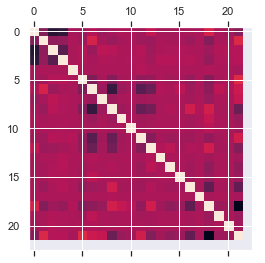

In [206]:
plt.matshow(matCorr)

## Features de 

In [92]:
dfFil = filteredDf(df, "ad campaign hit")

In [ ]:
dfFil[dfFil.url.str.startswith("/comprar/iphone") == True]["url"].value_counts()

# Write to csv

In [277]:
dfFeatures.head()

os model_brand  day_of_week  month  week day_vs_night browser  \
0      NaN         NaN            3      5    22        NIGHT     NaN   
1  Android         NaN            3      5    22        NIGHT  Chrome   
2      NaN      iPhone            3      5    22        NIGHT     NaN   
3      NaN      iPhone            3      5    22        NIGHT     NaN   
4      NaN     Samsung            1      5    22          DAY     NaN   

  hex_color  
0       NaN  
1       NaN  
2       NaN  
3   #808080  
4       NaN

In [278]:
#dfFeatures.to_csv("events_features.csv", index=False)

In [15]:
dfFeat = pd.read_csv("events_features.csv")

---
## Las conversiones de que celular se hicieron?

#### Hacer un fillna forward para valores de device_type etc, por usuario, para relacionar

In [116]:
dfFil = filteredDf(df, "conversion")

In [117]:
dfFil.head()

timestamp       event    person     sku  \
220  2018-03-20 17:46:12  conversion  00204059  3084.0   
2282 2018-04-26 22:28:53  conversion  00c13dee  6650.0   
2547 2018-06-10 14:37:50  conversion  00fdbb4b  3348.0   
4245 2018-03-16 13:50:25  conversion  0146a9df  2694.0   
6985 2018-02-09 22:07:07  conversion  01db2fe6  6357.0   

                                 model  condition storage           color  \
220                   Motorola Moto X2  Muito Bom    32GB   Couro Vintage   
2282  Samsung Galaxy Core Plus Duos TV  Muito Bom     4GB          Branco   
2547            Samsung Galaxy S6 Flat  Muito Bom    32GB          Branco   
4245                         iPhone 5s        Bom    32GB  Cinza espacial   
6985                 Samsung Galaxy J5        Bom    16GB           Preto   

     model_brand  
220     Motorola  
2282     Samsung  
2547     Samsung  
4245      iPhone  
6985     Samsung

In [124]:
df.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand'],
      dtype='object')

In [126]:
dfByPer = df.set_index(["person"])

In [6]:
countsByOS = dfByPer.iloc[0:3000].groupby("person").agg({"os":"value_counts"})

NameError: name 'dfByPer' is not defined

---
## Informacion de sesiones para cada persona

#### considero que los campos se mantienen hasta que cambian en el proximo visited_site, y venian igual al primero si no estan especificados

In [17]:
def getSessionByPerson(sessionStats, person, ses):
    person = sessionStats.loc[person]
    if ses not in person.index:
        try:
            ses =  person[(person.index < ses)].index[-1]
        except IndexError:
            ses = person.index[0]
    return person.loc[ses]

In [18]:
getSessionByPerson(sessionStats,"0004b0a2",0)

NameError: name 'sessionStats' is not defined

In [19]:
dfSess = pd.read_csv("session_stats.csv").set_index(["person", "session_number"])

In [10]:
dfIdx = df.set_index(["person", "session_num"])

In [31]:
dfSorted = dfIdx.sort_values(by="timestamp").groupby(["person", "session_num"])

In [114]:
vsChk = dfIdx[(dfIdx["event"]=="visited site") | (dfIdx["event"] == "checkout")]

In [135]:
idx = filteredDf(df, "visited site").set_index(["person", "session_num"])

In [142]:
nwIdx = idx.drop(columns =["timestamp", "event"])

In [149]:
validColumns(df)

{'ad campaign hit': array(['url', 'campaign_source', 'session_num'], dtype=object),
 'visited site': array(['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os', 'session_num'], dtype=object),
 'viewed product': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num'], dtype=object),
 'checkout': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num'], dtype=object),
 'generic listing': array(['skus', 'session_num'], dtype=object),
 'search engine hit': array(['search_engine', 'session_num'], dtype=object),
 'brand listing': array(['skus', 'session_num'], dtype=object),
 'searched products': array(['skus', 'search_term', 'session_num'], dtype=object),
 'conversion': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num'], dtype=object),
 'staticpage': array(['static

In [ ]:
dfIdx[["event","timestamp",'sku', 'model', 'condition', 'storage', 'color', 'model_brand']].join(nwIdx)

In [154]:
dfVisited = df.drop(columns=['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os',]).set_index(["person", "session_num"]).join(nwIdx)

In [175]:
dfIdx = dfIdx.index.drop_duplicates()

In [190]:
dfC = pd.DataFrame(index=dfIdx).join(nwIdx.drop(columns=["channel", "new_vs_returning"]))

In [192]:
idxC = dfC.index.drop_duplicates()

In [25]:
dfIdx[dfSess.columns] = dfSess

In [461]:
dfIdx[dfIdx["event"] == "conversion"].device_type.value_counts()

Computer      641
Smartphone    523
Tablet          6
Unknown         2
Name: device_type, dtype: int64

In [17]:
dfEvCh = dfIdx[(dfIdx["event"]=="visited site") | (dfIdx["event"] == "checkout")]

## Dataframe ordenado por persona y numero de sesion, con visited site arriba si existe, para siempre tener la informacion de visited site para cada sesion.

In [35]:
dfFeat = pd.read_csv("events_features.csv").drop(columns=["os", "model_brand"])

In [36]:
df = df.join(dfFeat)

In [37]:
dfPer = df.set_index("person")

In [38]:
visSitPer = df[df.event == "visited site"].person.drop_duplicates()

In [39]:
convPer = df[df.event == "conversion"].person.drop_duplicates()

In [40]:
idx = visSitPer.append(convPer).drop_duplicates().values

In [41]:
combined = visSitPer.append(convPer)

In [42]:
idx = combined[combined.duplicated()].values

In [43]:
dfEvConv = dfPer.loc[idx]

In [44]:
dfEvConv = dfEvConv[(dfEvConv.event=="visited site") | (dfEvConv.event=="conversion")].reset_index().drop_duplicates(["person", "device_type", "screen_resolution"]).set_index(["person", "session_num"])

In [45]:
validColumns(df)

{'ad campaign hit': array(['url', 'campaign_source', 'session_num', 'day_of_week', 'month',
        'week', 'day_vs_night'], dtype=object),
 'visited site': array(['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os', 'session_num', 'day_of_week', 'month',
        'week', 'day_vs_night', 'browser'], dtype=object),
 'viewed product': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num', 'day_of_week', 'month', 'week', 'day_vs_night'],
       dtype=object),
 'checkout': array(['sku', 'model', 'condition', 'storage', 'color', 'model_brand',
        'session_num', 'day_of_week', 'month', 'week', 'day_vs_night',
        'hex_color'], dtype=object),
 'generic listing': array(['skus', 'session_num', 'day_of_week', 'month', 'week',
        'day_vs_night'], dtype=object),
 'search engine hit': array(['search_engine', 'session_num', 'day_of_week',

In [46]:
dfEvConv = dfEvConv.sort_values(by=["person","timestamp"])

In [47]:
filled = dfEvConv[['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os', 'day_of_week', 'month',
        'week', 'day_vs_night', 'browser']].groupby(["person"]).fillna(method="ffill")

In [48]:
filled = filled.groupby("person").fillna(method="bfill")

In [51]:
dfEvConv[['channel', 'new_vs_returning', 'city', 'region', 'country',
        'device_type', 'screen_resolution', 'operating_system_version',
        'browser_version', 'os', 'day_of_week', 'month',
        'week', 'day_vs_night', 'browser']] = filled 

In [54]:
conversionStats = filteredDf(dfEvConv, "conversion")

In [55]:
#conversionStats.to_csv("conversion_stats.csv")

In [60]:
conversionStats.device_type.value_counts()

Computer      378
Smartphone    248
Tablet          4
Unknown         1
Name: device_type, dtype: int64

In [72]:
def hasSite(ser):
    return ser.str.contains("visited site")

In [149]:
conversions2 = df.groupby("person").filter(lambda x:("visited site" and "conversion") in x.event.values)

----
## Analisis Conversiones

In [13]:
dfc = pd.read_csv("conversion_stats.csv")

In [14]:
dfc.timestamp = pd.to_datetime(dfc.timestamp)

In [15]:
dfc.columns

Index(['person', 'session_num', 'timestamp', 'event', 'sku', 'model',
       'condition', 'storage', 'color', 'channel', 'new_vs_returning', 'city',
       'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand',
       'day_of_week', 'month', 'week', 'day_vs_night', 'browser'],
      dtype='object')

In [16]:
sns.catplot(x="week", y="event", hue="day_vs_night", data=dfc)

AttributeError: module 'seaborn' has no attribute 'catplot'

In [36]:
dfdn = dfc.groupby("month").agg({"day_vs_night":"count"})

In [37]:
dfdn

day_vs_night
month              
1                46
2                45
3               158
4               170
5               176
6                36

In [33]:
dfdn.ungrou

day_vs_night      
day_vs_night          DAY NIGHT
month                          
1                      16    30
2                      19    26
3                      57   101
4                      77    93
5                      72   104
6                      15    21

In [17]:
sns.catplot(x="model_brand", y="os", hue="day_vs_night",
            kind="violin", split=True, data=dfc);


AttributeError: module 'seaborn' has no attribute 'catplot'

In [51]:
dfc.model_brand.value_counts()

Samsung     329
iPhone      184
Motorola     88
LG           14
Lenovo        8
Sony          6
Asus          2
Name: model_brand, dtype: int64

In [56]:
dfc[dfc.model_brand=="iPhone"].os.value_counts()

Windows    103
Android     72
iOS          9
Name: os, dtype: int64

In [69]:
dfc[dfc.model_brand=="Samsung"].os.value_counts()

Windows    198
Android    116
iOS         10
OS X         2
Other        1
Name: os, dtype: int64

In [171]:
dfModelOs = dfc.groupby("country").agg({"os":"value_counts"}).unstack()

In [172]:
dfModelOs.columns = dfModelOs.columns.droplevel()

In [173]:
dfModelOs

os              Android  OS X  Other  Windows   iOS
country                                            
Brazil            222.0   2.0    1.0    361.0  24.0
United Kingdom      NaN   NaN    NaN      1.0   NaN
Unknown             3.0   NaN    NaN     15.0   NaN

In [179]:
dfModelOs = dfc.groupby("model_brand").agg({"day_vs_night":"value_counts"}).unstack()

In [180]:
dfModelOs.columns = dfModelOs.columns.droplevel()

In [181]:
dfModelOs

day_vs_night    DAY  NIGHT
model_brand               
Asus            1.0    1.0
LG              3.0   11.0
Lenovo          NaN    8.0
Motorola       32.0   56.0
Samsung       141.0  188.0
Sony            3.0    3.0
iPhone         76.0  108.0

In [62]:
dfc[dfc.os == "iOS"].model_brand.value_counts()

Samsung     10
iPhone       9
Motorola     5
Name: model_brand, dtype: int64

In [65]:
dfDummies = pd.get_dummies(dfc, columns=["os", "model_brand"])

In [66]:
dfDummies.columns

Index(['person', 'session_num', 'timestamp', 'event', 'sku', 'model',
       'condition', 'storage', 'color', 'channel', 'new_vs_returning', 'city',
       'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'day_of_week', 'month',
       'week', 'day_vs_night', 'browser', 'os_Android', 'os_OS X', 'os_Other',
       'os_Windows', 'os_iOS', 'model_brand_Asus', 'model_brand_LG',
       'model_brand_Lenovo', 'model_brand_Motorola', 'model_brand_Samsung',
       'model_brand_Sony', 'model_brand_iPhone'],
      dtype='object')

In [188]:
sns.pointplot(x="model_brand", y="month", hue="os_Andriod" ,data=dfDummies)

/home/juan/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [20]:
sns.catplot(y="timestamp", x="model_brand", hue="os", kind="swarm", data=dfc)

AttributeError: module 'seaborn' has no attribute 'catplot'

In [192]:
dfc.columns

Index(['person', 'session_num', 'timestamp', 'event', 'sku', 'model',
       'condition', 'storage', 'color', 'channel', 'new_vs_returning', 'city',
       'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'os', 'model_brand',
       'day_of_week', 'month', 'week', 'day_vs_night', 'browser'],
      dtype='object')

In [234]:
sns.catplot(y="timestamp", x="condition", hue="model_brand", kind="strip", data=dfc)

In [229]:
sns.catplot( y="month", x="model_brand" , hue="day_vs_night", kind="violin", split=True, data=dfc)

/home/juan/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [235]:
data = dfc[["model_brand", "os", "day_vs_night"]]

In [242]:
data = data.astype("category")

In [ ]:
sns.pairplot(data, hue="os")

In [262]:
sns.catplot(y="timestamp", x="day_vs_night", hue="os", kind="swarm"
            , data=dfc);

---
# seguimientos Eventos

In [265]:
df.event.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [18]:
ev = pd.read_csv("eventos.csv").set_index("Unnamed: 0")

In [19]:
ev

ad campaign hit  visited site  viewed product  checkout  \
Unnamed: 0                                                                   
ad campaign hit             3390.0       17118.0         28893.0    1120.0   
visited site               19571.0        3516.0         25821.0    1927.0   
viewed product             25811.0       25144.0        367594.0   28415.0   
checkout                     791.0        1185.0          1900.0     754.0   
generic listing             7540.0       10227.0         23176.0     203.0   
search engine hit          13693.0       10058.0          8369.0     312.0   
brand listing               4728.0        4967.0         44313.0     123.0   
searched products           1300.0        2512.0         26093.0      52.0   
conversion                    87.0         323.0            69.0     226.0   
staticpage                   259.0         605.0           810.0      36.0   
lead                          59.0         204.0            27.0       3.0   
NaN                            0.0           0.0             0.0       0.0   

                   generic listing  search engine hit  brand listing  \
Unnamed: 0                                                             
ad campaign hit            12760.0            12048.0         6266.0   
visited site               16346.0            11152.0         5772.0   
viewed product             13770.0            10797.0        35598.0   
checkout                     617.0              262.0           99.0   
generic listing             4635.0             7124.0         7772.0   
search engine hit          12383.0              955.0         3990.0   
brand listing               2497.0             2657.0        37151.0   
searched products           1213.0             1003.0         1251.0   
conversion                   282.0               40.0           20.0   
staticpage                   418.0              230.0          217.0   
lead                          38.0               41.0           14.0   
NaN                            0.0                0.0            0.0   

                   searched products  conversion  staticpage   lead  \
Unnamed: 0                                                            
ad campaign hit               1094.0        14.0        94.0   14.0   
visited site                  2511.0        82.0       496.0   15.0   
viewed product               20593.0        66.0       980.0  145.0   
checkout                        49.0       619.0        33.0   16.0   
generic listing               6101.0        68.0       654.0   33.0   
search engine hit              983.0         4.0       193.0    7.0   
brand listing                 1987.0        15.0       158.0   39.0   
searched products            22550.0         7.0        79.0   13.0   
conversion                      14.0       104.0         6.0    1.0   
staticpage                     137.0         6.0       877.0    3.0   
lead                             7.0         2.0         1.0   52.0   
NaN                              0.0         0.0         0.0    0.0   

                   Unnamed: 12  
Unnamed: 0                      
ad campaign hit           16.0  
visited site             169.0  
viewed product            18.0  
checkout               27410.0  
generic listing            1.0  
search engine hit         10.0  
brand listing              0.0  
searched products          0.0  
conversion                 0.0  
staticpage                 0.0  
lead                       0.0  
NaN                        0.0

In [ ]:
sns.pointplot(data=ev)

---
# Tiempo promedio por sesion

In [14]:
sesgroup = df.groupby(["person", "session_num"])

In [12]:
df[df.person == "000a54b2"]

timestamp              event    person  url      sku  \
8  2018-04-09 20:12:31    generic listing  000a54b2  NaN      NaN   
9  2018-04-09 20:12:31       visited site  000a54b2  NaN      NaN   
10 2018-04-09 20:12:31  search engine hit  000a54b2  NaN      NaN   
11 2018-04-09 20:12:31    ad campaign hit  000a54b2    /      NaN   
12 2018-04-09 20:12:53      brand listing  000a54b2  NaN      NaN   
13 2018-04-09 20:13:14     viewed product  000a54b2  NaN  12661.0   
14 2018-04-09 20:13:20      brand listing  000a54b2  NaN      NaN   
15 2018-05-24 11:21:07    ad campaign hit  000a54b2    /      NaN   
16 2018-05-24 11:21:07       visited site  000a54b2  NaN      NaN   
17 2018-05-24 11:21:07  search engine hit  000a54b2  NaN      NaN   
18 2018-05-24 11:21:08    generic listing  000a54b2  NaN      NaN   
19 2018-05-24 11:26:34    generic listing  000a54b2  NaN      NaN   
20 2018-05-24 11:26:53      brand listing  000a54b2  NaN      NaN   
21 2018-05-24 11:26:56    generic listing  000a54b2  NaN      NaN   
22 2018-05-24 11:27:47     viewed product  000a54b2  NaN  10254.0   
23 2018-05-24 11:27:50    generic listing  000a54b2  NaN      NaN   
24 2018-05-24 11:28:10      brand listing  000a54b2  NaN      NaN   
25 2018-05-24 11:28:36      brand listing  000a54b2  NaN      NaN   
26 2018-05-24 11:28:59     viewed product  000a54b2  NaN   6581.0   
27 2018-05-24 11:29:06     viewed product  000a54b2  NaN   6579.0   
28 2018-05-24 11:29:14     viewed product  000a54b2  NaN   6580.0   
29 2018-05-24 11:29:16     viewed product  000a54b2  NaN   6581.0   
30 2018-05-24 11:29:19     viewed product  000a54b2  NaN   6580.0   
31 2018-05-24 11:29:23     viewed product  000a54b2  NaN   8965.0   
32 2018-05-24 11:30:07     viewed product  000a54b2  NaN   6580.0   
33 2018-05-24 11:30:09     viewed product  000a54b2  NaN   6581.0   
34 2018-05-24 11:30:11     viewed product  000a54b2  NaN   6580.0   
35 2018-05-24 11:30:15     viewed product  000a54b2  NaN   6579.0   
36 2018-05-24 11:30:16     viewed product  000a54b2  NaN   6581.0   
37 2018-05-24 11:30:18     viewed product  000a54b2  NaN   6580.0   
38 2018-05-24 11:30:22     viewed product  000a54b2  NaN   6874.0   
39 2018-05-24 11:30:24     viewed product  000a54b2  NaN   6930.0   
40 2018-05-24 11:30:26     viewed product  000a54b2  NaN   6902.0   
41 2018-05-24 11:30:29     viewed product  000a54b2  NaN   6916.0   
42 2018-05-24 11:32:39      brand listing  000a54b2  NaN      NaN   
43 2018-05-24 11:33:23     viewed product  000a54b2  NaN  12660.0   
44 2018-05-24 11:34:32           checkout  000a54b2  NaN  12660.0   

                   model  condition storage           color  \
8                    NaN        NaN     NaN             NaN   
9                    NaN        NaN     NaN             NaN   
10                   NaN        NaN     NaN             NaN   
11                   NaN        NaN     NaN             NaN   
12                   NaN        NaN     NaN             NaN   
13  Motorola Moto Z Play  Muito Bom    32GB           Preto   
14                   NaN        NaN     NaN             NaN   
15                   NaN        NaN     NaN             NaN   
16                   NaN        NaN     NaN             NaN   
17                   NaN        NaN     NaN             NaN   
18                   NaN        NaN     NaN             NaN   
19                   NaN        NaN     NaN             NaN   
20                   NaN        NaN     NaN             NaN   
21                   NaN        NaN     NaN             NaN   
22         iPhone 7 Plus  Excelente   256GB         Dourado   
23                   NaN        NaN     NaN             NaN   
24                   NaN        NaN     NaN             NaN   
25                   NaN        NaN     NaN             NaN   
26             iPhone 6S        Bom    16GB  Cinza espacial   
27             iPhone 6S  Excelente    16GB  Cinza espacial   
28             iPhone 6S  Muito Bom    16GB  Cinza espacial   
29  

In [16]:
sessions = sesgroup.timestamp.agg(lambda x: x.iloc[x.count()-1] - x.iloc[0])

In [60]:
(sessions != pd.Timedelta(0)).mean()*100

87.86811191682968

In [63]:
sessions = sessions.reset_index()

In [86]:
#sessions.to_csv("time_per_session")

In [16]:
sessions = pd.read_csv("time_per_session").drop(columns="Unnamed: 0")

In [17]:
sessions.timestamp = pd.to_timedelta(sessions.timestamp)

In [18]:
sessions["minutes"] = sessions.timestamp.dt.seconds/60

In [19]:
meanSess = sessions.groupby("person").agg({"session_num":"max", "minutes":"mean"})

In [20]:
sessions = sessions.rename(columns={"timestamp":"time_by_session"})

In [48]:
sessions.head()

session_num time_by_session    minutes           timestamp  \
person                                                                 
0004b0a2          0.0        00:00:35   0.583333 2018-05-31 23:38:05   
0006a21a          0.0        00:00:10   0.166667 2018-05-29 13:29:25   
000a54b2          0.0        00:00:49   0.816667 2018-04-09 20:12:31   
000a54b2          1.0        00:13:25  13.416667 2018-05-24 11:21:07   
00184bf9          0.0        00:06:10   6.166667 2018-04-06 05:12:05   

               day  hour  
person                    
0004b0a2  Thursday    23  
0006a21a   Tuesday    13  
000a54b2    Monday    20  
000a54b2  Thursday    11  
00184bf9    Friday     5

In [22]:
sessions = sessions.set_index(["person", "session_num"])

In [23]:
firstOfEachSess = df.groupby(["person", "session_num"]).timestamp.first()

In [24]:
sessions = sessions.join(firstOfEachSess)

In [25]:
sessions["day"] = sessions.timestamp.dt.day_name()

In [26]:
sessions["hour"] = sessions.timestamp.dt.hour

In [33]:
sessions = sessions.reset_index(level=1)

In [35]:
sesGroup = sessions.groupby("person").agg({"session_num": "max", "minutes": "mean"})

In [96]:
sesGroup.head()

session_num   minutes
person                         
0004b0a2          0.0  0.583333
0006a21a          0.0  0.166667
000a54b2          1.0  7.116667
00184bf9          2.0  3.155556
0019c395          0.0  2.500000

In [104]:
sesGroup = sesGroup.sort_values(by="minutes").reset_index()

In [111]:
s2 = sesGroup.reset_index()

In [113]:
sns.lineplot(x="index", y="minutes", hue="session_num", data=s2)

In [39]:
sessions.head()

session_num time_by_session    minutes           timestamp  \
person                                                                 
0004b0a2          0.0        00:00:35   0.583333 2018-05-31 23:38:05   
0006a21a          0.0        00:00:10   0.166667 2018-05-29 13:29:25   
000a54b2          0.0        00:00:49   0.816667 2018-04-09 20:12:31   
000a54b2          1.0        00:13:25  13.416667 2018-05-24 11:21:07   
00184bf9          0.0        00:06:10   6.166667 2018-04-06 05:12:05   

               day  hour  
person                    
0004b0a2  Thursday    23  
0006a21a   Tuesday    13  
000a54b2    Monday    20  
000a54b2  Thursday    11  
00184bf9    Friday     5

In [54]:
sns.set_palette(sns.color_palette("Blues"))

In [56]:
sns.catplot(x="day", y="minutes", hue="hour", data=sessions)

In [36]:
sesGroup.head()

session_num   minutes
person                         
0004b0a2          0.0  0.583333
0006a21a          0.0  0.166667
000a54b2          1.0  7.116667
00184bf9          2.0  3.155556
0019c395          0.0  2.500000

In [41]:
sns.lineplot(x="session_num", y="minutes", data=sesGroup)

/home/juan/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [42]:
sns.pointplot(x="session_num", y="minutes", data=sesGroup)

/home/juan/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [47]:
sns.pointplot(x="day", y="minutes", hue="session_num", data=sessions)

/home/juan/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyboardInterrupt: 

In [113]:
vals = sessions.minutes.sort_values(ascending=False)

In [95]:
vals.plot(y="timestamp", use_index=False)

NameError: name 'vals' is not defined

In [70]:
s2 = sessions.reset_index()

In [73]:
sns.relplot(y="minutes", x="session_num", kind="line",
            hue="person",data=s2)

KeyboardInterrupt: 

---
de donde provienen los usuarios que salen

In [58]:
ev = pd.read_csv("matriz_eventos_20min.csv")

In [61]:
ev = ev.set_index("Unnamed: 0")

In [80]:
salidas = ev[["salida"]].reset_index()

In [81]:
salidas

Unnamed: 0  salida
0     ad campaign hit    3261
1        visited site    5559
2      viewed product   36088
3            checkout   29203
4     generic listing    5723
5   search engine hit    1242
6       brand listing    6144
7   searched products    3691
8          conversion     438
9          staticpage     778
10               lead     406
11            entrada       0
12             salida       0

In [93]:
salidas = salidas.rename(columns={"Unnamed: 0":"event"})

In [94]:
plt.xticks(rotation=45)
sns.barplot(x="event", y="salida", data=salidas)